In [2]:
#load the dataset
import pandas as pd
dataset=pd.read_csv('tweets.csv',encoding='ISO-8859-1')
dataset.head(3)

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False


In [3]:
dataset.shape

(14940, 16)

In [4]:
def gen_freq(text):
    word_list=[]
    for tw_words in text.split():
        word_list.extend(tw_words)
    word_freq=pd.Series(word_list).value_counts()
    word_freq[:10]
    return word_freq

In [5]:
word_freq=gen_freq(dataset.text.str)
word_freq

RT                         11053
to                          7650
is                          5152
in                          4491
the                         4331
                           ...  
#News                          1
notes|                         1
https://t.co/ECl4oIzdHA        1
https://t.co/9MjFtLtCtR        1
https://t.co/hwgqjbqgvG        1
Name: count, Length: 19601, dtype: int64

In [6]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/00/09/abb305dce85911b8fba382926cfc57f2f257729e25937fdcc63f3a1a67f9/wordcloud-1.9.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/299.9 kB 388.9 kB/s eta 0:00:01
   ----- --------------------------------- 41.0/299.9 kB 388.9 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/299.9 kB 357.2 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 374.1 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/299.9 kB 374.1 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 359.9 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/299.9 kB 398.2 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/299.9 kB 533.8 kB/s eta 0:00:01
   --

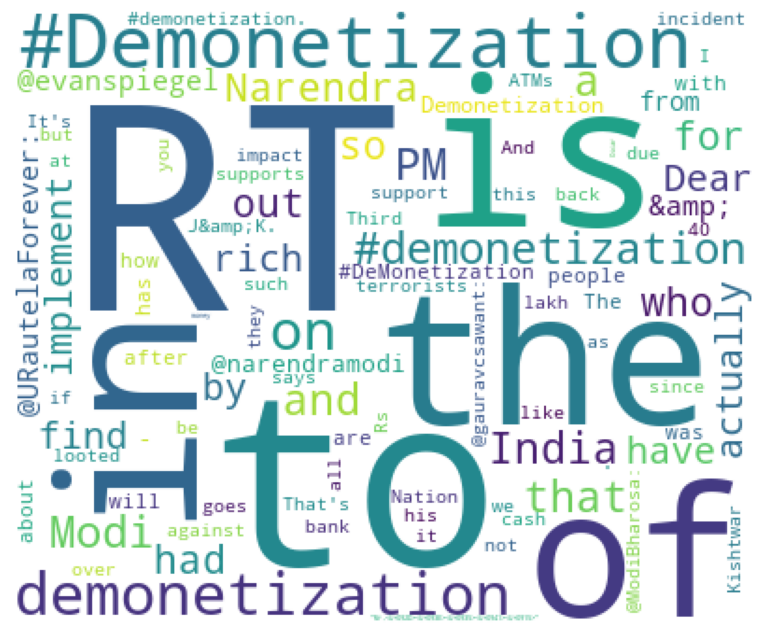

In [7]:
#import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#generate word cloud
wc=WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [8]:
import re
def clean_text(text):
    text=re.sub(r'RT','',text)
    text=re.sub(r'&amp;','',text)
    text=re.sub(r'[?!.;:,#@-]','',text)
    text=text.lower()
    text=re.sub(r'\d+','',text)
    text=re.sub(r'%','',text)
    return text

In [9]:
import re
def clean_text(text):
    
    text = re.sub(r'RT', '', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[?!.;:,#@-]', '', text)
    text =re.sub(r'\d+', '', text)
    text = re.sub(r'%', '', text)
    return text

In [10]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{"isn't", 'having', "you'll", 'very', "shouldn't", "doesn't", 'however', 'otherwise', 'cannot', 'than', 'because', "i'm", 'k', 'once', 'would', 'yourself', 'his', "wouldn't", 'how', 'at', 'few', 'nor', 'again', 'me', "couldn't", 'down', "won't", 'both', 'her', 'http', "he'd", "don't", 'to', 'ours', 'these', 'about', "what's", 'they', 'r', 'some', 'has', 'below', 'or', 'more', 'being', 'during', 'ought', 'be', 'those', 'an', 'and', "he'll", 'over', 'above', "here's", 'themselves', 'your', 'while', 'after', 'off', 'she', 'yours', 'www', 'in', 'own', 'too', 'their', 'why', 'further', 'against', 'here', 'since', 'there', 'been', 'ever', 'before', "we'll", 'get', "let's", "you'd", "he's", 'no', 'other', "hadn't", 'doing', 'who', 'else', "they'd", 'into', "they'll", "mustn't", 'for', 'is', 'not', "she'd", 'are', 'most', 'them', "haven't", 'myself', 'you', "she'll", 'did', 'itself', 'on', "where's", 'but', 'only', "didn't", 'if', 'my', "hasn't", 'so', "there's", 'under', "i'll", 'until', "who

In [ ]:
#import libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
text=dataset.text.apply(lambda x:clean_text(x))
word_freq(text.str)
word_freq=word_freq.drop(labels=STOPWORDS)
#generate word cloud
wc=WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis('off')
plt.show()


In [ ]:
import pandas as pd
text=['Sarah lives in a hut in the village.','She has an apple tree in her backyard.','The apples are red in colour.']
pd.DataFrame(text,columns=['Sentence'])
df